In [4]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'SimHei'  # 对于中文，使用 SimHei 字体
plt.rcParams['axes.unicode_minus'] = False  # 正常显示负号


解得的r = 2.0834146524426718
解得的h1 = 0.42843205172454674
解得的h2 = 0.12156794827545325


C:\Users\lianh\AppData\Local\Temp\ipykernel_25964\1715049936.py:41: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(r**2 - l1**2 / 4)


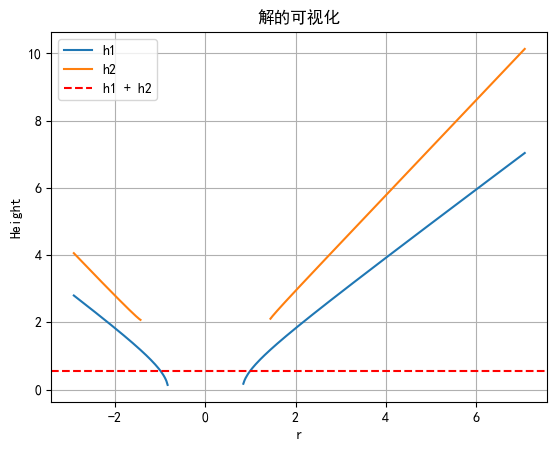

In [8]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt

# 参数定义
l1 = 1.65
l0 = 2.86
s = np.sqrt(0.15**2 + 0.275**2)
alpha1 = np.arctan(15 / 27.5)

# 定义方程组
def equations(vars):
    r, h1, h2 = vars
    if l0 / (2 * r) > 1 or l0 / (2 * r) < -1:
        eq2 = np.nan  # 无效值
    else:
        eq2 = np.pi - np.arccos(l0 / (2 * r)) + alpha1

    eq1 = r - np.sqrt(r**2 - l1**2 / 4) - h2
    eq3 = h1**2 - r**2 - s**2 + 2 * r * s * np.cos(eq2)
    eq4 = h1 + h2 - 0.55
    return [eq1, eq3, eq4]

# 适当选择初始猜测值，确保在正值范围内
initial_guess = [30, 1, 1]

# 求解方程组
solution = opt.fsolve(equations, initial_guess)
r, h1, h2 = solution

# 打印结果，确保所有结果都是正值
if r > 0 and h1 > 0 and h2 > 0:
    print(f"解得的r = {r}")
    print(f"解得的h1 = {h1}")
    print(f"解得的h2 = {h2}")
else:
    print("求解失败，得到的解包含非正值。")

# 可视化验证
def calculate_h1(r):
    return np.sqrt(r**2 - l1**2 / 4)

def calculate_alpha(r):
    if l0 / (2 * r) > 1 or l0 / (2 * r) < -1:
        return np.nan  # 无效值
    else:
        return np.pi - np.arccos(l0 / (2*r)) + alpha1

def calculate_h2(r, h1):
    alpha = calculate_alpha(r)
    if np.isnan(alpha):
        return np.nan  # 无效值
    else:
        return np.sqrt(h1**2 + r**2 + s**2 - 2 * r * s * np.cos(alpha))

# 生成数据点
r_values = np.linspace(r - 5, r + 5, 400)
h1_values = np.array([calculate_h1(rv) for rv in r_values])
h2_values = np.array([calculate_h2(rv, h1) for rv, h1 in zip(r_values, h1_values)])

# 绘制结果
plt.plot(r_values, h1_values, label='h1')
plt.plot(r_values, h2_values, label='h2')
plt.axhline(y=0.55, color='r', linestyle='--', label='h1 + h2')
plt.xlabel('r')
plt.ylabel('Height')
plt.legend()
plt.grid()
plt.title('解的可视化')
plt.show()


In [11]:
r0 = r - 0.55
# 螺线方程 r = b*theta
b = 0.55 / (2 * np.pi)  # 螺距除以2π得到b
v = 1#速度1m/s
#根据螺线方程求theta
#求解阿基米德螺线弧长
def calcule_arc_length(theta):
    arc_length = 0.5 * b * (theta * np.sqrt(1 + theta ** 2) + np.arcsinh(theta))
    return arc_length
theta = r0 / b
# 求解theta对应的弧长
arc_length = calcule_arc_length(32*np.pi)- calcule_arc_length(theta)
t = arc_length / v
print(f"解得的theta = {theta}")    # 打印结果
print(f"解得的弧长 = {arc_length}")    # 打印结果
print(f"解得的t = {t}")    # 打印结果

解得的theta = 17.51768802553034
解得的弧长 = 428.9817617653601
解得的t = 428.9817617653601
